In [1]:
from Models.MainModel import InitModel
from Config import Config
from Utils.Visualization import ShowCAM
from Utils.FileOperation import ls

from pytorch_grad_cam import GradCAMPlusPlus as CAM
import numpy as np
import torch
import random
from PIL import Image

In [2]:
config = Config()
config.apply()

In [3]:
transform = config.test.transform['standard']
checkpoint_paths = [
    ('Checkpoints/CDF/checkpoint_25.pth', config),
    ('Checkpoints/CDF_noGaze/checkpoint_25.pth', config),
]
data_paths = []
data_root = config.basic.rootDir + 'clipped_videos/CDF_clip/fake_test/'
current_files = ls(data_root)
random.shuffle(current_files)
for i in range(10):
    data_paths.append(data_root + current_files[i])

Initializing base model
Checkpoints/CDF/checkpoint_25.pth /home/kyr/GazeForensicsData/clipped_videos/CDF_clip/fake_test/Celeb-synthesis_id30_id3_0002_3.mp4
 > Prediction: [0.99656785 0.00343209]
Initializing base model
Checkpoints/CDF_noGaze/checkpoint_25.pth /home/kyr/GazeForensicsData/clipped_videos/CDF_clip/fake_test/Celeb-synthesis_id30_id3_0002_3.mp4
 > Prediction: [9.9979931e-01 2.0073299e-04]


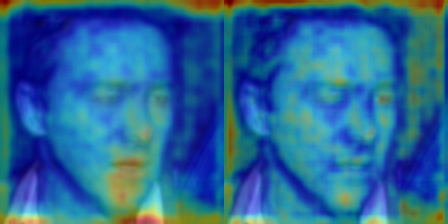

Initializing base model
Checkpoints/CDF/checkpoint_25.pth /home/kyr/GazeForensicsData/clipped_videos/CDF_clip/fake_test/Celeb-synthesis_id21_id4_0002_2.mp4
 > Prediction: [0.99883956 0.00116048]
Initializing base model
Checkpoints/CDF_noGaze/checkpoint_25.pth /home/kyr/GazeForensicsData/clipped_videos/CDF_clip/fake_test/Celeb-synthesis_id21_id4_0002_2.mp4
 > Prediction: [9.9995255e-01 4.7461355e-05]


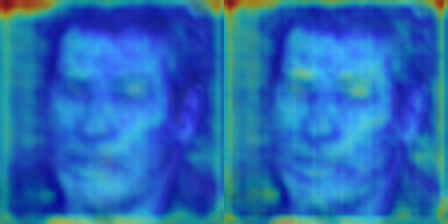

Initializing base model
Checkpoints/CDF/checkpoint_25.pth /home/kyr/GazeForensicsData/clipped_videos/CDF_clip/fake_test/Celeb-synthesis_id35_id30_0006_2.mp4
 > Prediction: [0.975322   0.02467798]
Initializing base model
Checkpoints/CDF_noGaze/checkpoint_25.pth /home/kyr/GazeForensicsData/clipped_videos/CDF_clip/fake_test/Celeb-synthesis_id35_id30_0006_2.mp4
 > Prediction: [0.997993   0.00200707]


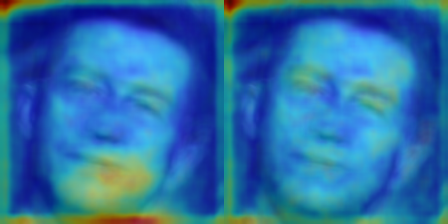

Initializing base model
Checkpoints/CDF/checkpoint_25.pth /home/kyr/GazeForensicsData/clipped_videos/CDF_clip/fake_test/Celeb-synthesis_id35_id20_0007_2.mp4
 > Prediction: [0.9978594  0.00214055]
Initializing base model
Checkpoints/CDF_noGaze/checkpoint_25.pth /home/kyr/GazeForensicsData/clipped_videos/CDF_clip/fake_test/Celeb-synthesis_id35_id20_0007_2.mp4
 > Prediction: [0.997113   0.00288701]


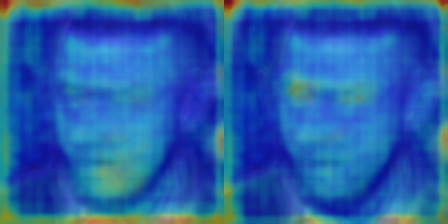

Initializing base model
Checkpoints/CDF/checkpoint_25.pth /home/kyr/GazeForensicsData/clipped_videos/CDF_clip/fake_test/Celeb-synthesis_id13_id10_0008_1.mp4
 > Prediction: [0.00209508 0.9979049 ]
 > Skip
Initializing base model
Checkpoints/CDF/checkpoint_25.pth /home/kyr/GazeForensicsData/clipped_videos/CDF_clip/fake_test/Celeb-synthesis_id53_id57_0005_0.mp4
 > Prediction: [0.99575967 0.00424028]
Initializing base model
Checkpoints/CDF_noGaze/checkpoint_25.pth /home/kyr/GazeForensicsData/clipped_videos/CDF_clip/fake_test/Celeb-synthesis_id53_id57_0005_0.mp4
 > Prediction: [0.8644573 0.1355427]


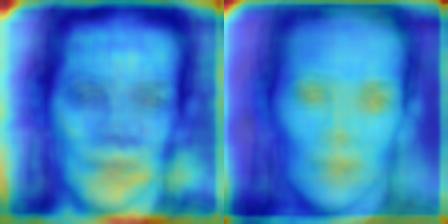

Initializing base model
Checkpoints/CDF/checkpoint_25.pth /home/kyr/GazeForensicsData/clipped_videos/CDF_clip/fake_test/Celeb-synthesis_id1_id20_0001_1.mp4
 > Prediction: [0.00245934 0.9975407 ]
 > Skip
Initializing base model
Checkpoints/CDF/checkpoint_25.pth /home/kyr/GazeForensicsData/clipped_videos/CDF_clip/fake_test/Celeb-synthesis_id56_id57_0007_2.mp4
 > Prediction: [0.9843195  0.01568052]
Initializing base model
Checkpoints/CDF_noGaze/checkpoint_25.pth /home/kyr/GazeForensicsData/clipped_videos/CDF_clip/fake_test/Celeb-synthesis_id56_id57_0007_2.mp4
 > Prediction: [0.9924332  0.00756676]


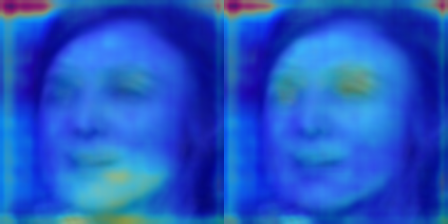

Initializing base model
Checkpoints/CDF/checkpoint_25.pth /home/kyr/GazeForensicsData/clipped_videos/CDF_clip/fake_test/Celeb-synthesis_id13_id10_0008_3.mp4
 > Prediction: [1.5975800e-04 9.9984026e-01]
 > Skip
Initializing base model
Checkpoints/CDF/checkpoint_25.pth /home/kyr/GazeForensicsData/clipped_videos/CDF_clip/fake_test/Celeb-synthesis_id29_id32_0000_5.mp4
 > Prediction: [0.96277183 0.03722815]
Initializing base model
Checkpoints/CDF_noGaze/checkpoint_25.pth /home/kyr/GazeForensicsData/clipped_videos/CDF_clip/fake_test/Celeb-synthesis_id29_id32_0000_5.mp4
 > Prediction: [0.9745413 0.0254587]


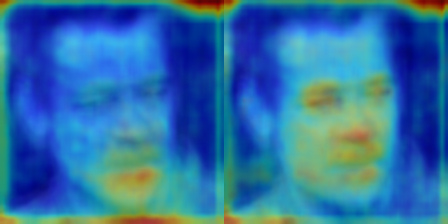

In [4]:
for data_path in data_paths:
    result = []
    skip_flag = False
    for checkpoint_path, current_config in checkpoint_paths:
        model = InitModel(current_config)
        checkpoint = torch.load(checkpoint_path)
        model.load_state_dict(checkpoint['state_dict'])
        target_layers = [
            model.module.base_model.layer1[-1],
            model.module.base_model.layer2[-1],
            model.module.base_model.layer3[-1],
            model.module.base_model.layer4[-1]
        ]
        cam = CAM(model=model, target_layers=target_layers, use_cuda=True)
        print(checkpoint_path, data_path)
        showCAM_result = ShowCAM(cam, model, data_path, transform, show=False, wanted_result_type='TN')
        if showCAM_result is None:
            skip_flag = True
            break
        result.append(showCAM_result)
    
    if skip_flag:
        continue
        
    mean_img = [np.zeros((224,224,3)), np.zeros((224,224,3))]
    for i in range(len(checkpoint_paths)):
        for j in range(14):
            mean_img[i] += np.array(result[i][j])
        mean_img[i] /= 14
        mean_img[i] = Image.fromarray(mean_img[i].astype(np.uint8))
    
    concatenated_image = Image.new('RGB', (224*len(checkpoint_paths), 224))
    for i in range(len(checkpoint_paths)):
        concatenated_image.paste(mean_img[i], (224*i, 0))
    concatenated_image.show()

In [3]:
transform = config.test.transform['standard']
checkpoint_paths = [
    ('Checkpoints/CDF/checkpoint_25.pth', config),
    ('Checkpoints/CDF_noGaze/checkpoint_25.pth', config),
]
data_paths = []
data_root = config.basic.rootDir + 'clipped_videos/CDF_clip/real_test/'
current_files = ls(data_root)
random.shuffle(current_files)
for i in range(10):
    data_paths.append(data_root + current_files[i])

Initializing base model
Checkpoints/CDF/checkpoint_25.pth /home/kyr/GazeForensicsData/clipped_videos/CDF_clip/real_test/YouTube-real_00194_12.mp4
 > Prediction: [1.2801452e-06 9.9999869e-01]
Initializing base model
Checkpoints/CDF_noGaze/checkpoint_25.pth /home/kyr/GazeForensicsData/clipped_videos/CDF_clip/real_test/YouTube-real_00194_12.mp4
 > Prediction: [3.5234189e-07 9.9999964e-01]


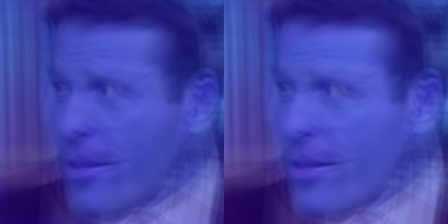

Initializing base model
Checkpoints/CDF/checkpoint_25.pth /home/kyr/GazeForensicsData/clipped_videos/CDF_clip/real_test/Celeb-real_id28_0007_3.mp4
 > Prediction: [5.568617e-06 9.999944e-01]
Initializing base model
Checkpoints/CDF_noGaze/checkpoint_25.pth /home/kyr/GazeForensicsData/clipped_videos/CDF_clip/real_test/Celeb-real_id28_0007_3.mp4
 > Prediction: [2.9804664e-06 9.9999702e-01]


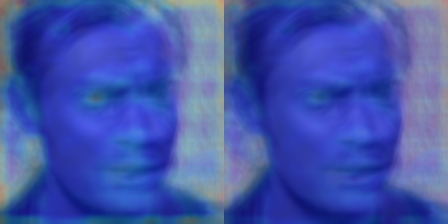

Initializing base model
Checkpoints/CDF/checkpoint_25.pth /home/kyr/GazeForensicsData/clipped_videos/CDF_clip/real_test/Celeb-real_id1_0006_10.mp4
 > Prediction: [2.000005e-04 9.998000e-01]
Initializing base model
Checkpoints/CDF_noGaze/checkpoint_25.pth /home/kyr/GazeForensicsData/clipped_videos/CDF_clip/real_test/Celeb-real_id1_0006_10.mp4
 > Prediction: [0.10646503 0.89353496]


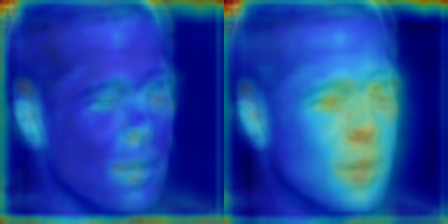

Initializing base model
Checkpoints/CDF/checkpoint_25.pth /home/kyr/GazeForensicsData/clipped_videos/CDF_clip/real_test/Celeb-real_id37_0004_3.mp4
 > Prediction: [2.8587169e-06 9.9999714e-01]
Initializing base model
Checkpoints/CDF_noGaze/checkpoint_25.pth /home/kyr/GazeForensicsData/clipped_videos/CDF_clip/real_test/Celeb-real_id37_0004_3.mp4
 > Prediction: [9.8761552e-07 9.9999905e-01]


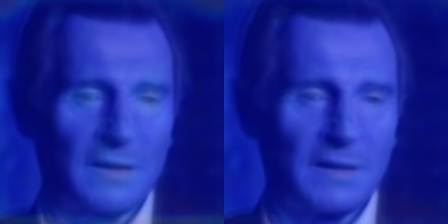

Initializing base model
Checkpoints/CDF/checkpoint_25.pth /home/kyr/GazeForensicsData/clipped_videos/CDF_clip/real_test/Celeb-real_id3_0002_4.mp4
 > Prediction: [0.03337426 0.9666257 ]
Initializing base model
Checkpoints/CDF_noGaze/checkpoint_25.pth /home/kyr/GazeForensicsData/clipped_videos/CDF_clip/real_test/Celeb-real_id3_0002_4.mp4
 > Prediction: [0.00893119 0.99106884]


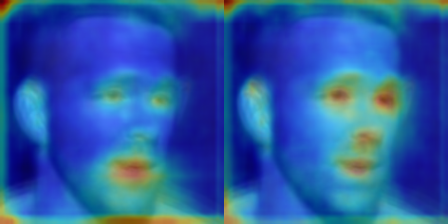

Initializing base model
Checkpoints/CDF/checkpoint_25.pth /home/kyr/GazeForensicsData/clipped_videos/CDF_clip/real_test/Celeb-real_id17_0000_2.mp4
 > Prediction: [1.4784015e-04 9.9985218e-01]
Initializing base model
Checkpoints/CDF_noGaze/checkpoint_25.pth /home/kyr/GazeForensicsData/clipped_videos/CDF_clip/real_test/Celeb-real_id17_0000_2.mp4
 > Prediction: [1.0993725e-04 9.9989009e-01]


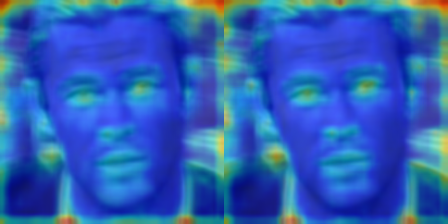

Initializing base model
Checkpoints/CDF/checkpoint_25.pth /home/kyr/GazeForensicsData/clipped_videos/CDF_clip/real_test/Celeb-real_id37_0009_4.mp4
 > Prediction: [0.00115543 0.9988445 ]
Initializing base model
Checkpoints/CDF_noGaze/checkpoint_25.pth /home/kyr/GazeForensicsData/clipped_videos/CDF_clip/real_test/Celeb-real_id37_0009_4.mp4
 > Prediction: [0.0036062  0.99639386]


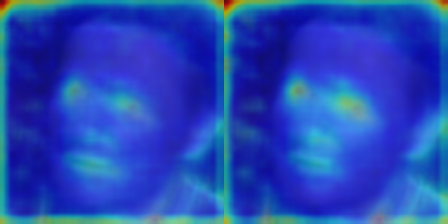

Initializing base model
Checkpoints/CDF/checkpoint_25.pth /home/kyr/GazeForensicsData/clipped_videos/CDF_clip/real_test/YouTube-real_00236_7.mp4
 > Prediction: [0.10890048 0.8910996 ]
Initializing base model
Checkpoints/CDF_noGaze/checkpoint_25.pth /home/kyr/GazeForensicsData/clipped_videos/CDF_clip/real_test/YouTube-real_00236_7.mp4
 > Prediction: [0.01586862 0.9841314 ]


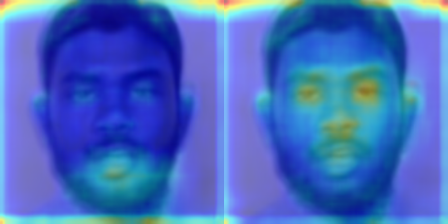

Initializing base model
Checkpoints/CDF/checkpoint_25.pth /home/kyr/GazeForensicsData/clipped_videos/CDF_clip/real_test/Celeb-real_id3_0002_2.mp4
 > Prediction: [0.18340442 0.8165956 ]
Initializing base model
Checkpoints/CDF_noGaze/checkpoint_25.pth /home/kyr/GazeForensicsData/clipped_videos/CDF_clip/real_test/Celeb-real_id3_0002_2.mp4
 > Prediction: [0.15905802 0.84094197]


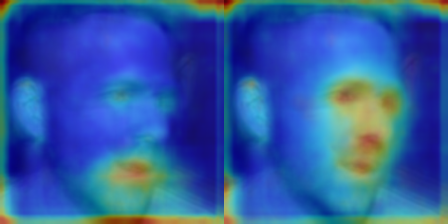

Initializing base model
Checkpoints/CDF/checkpoint_25.pth /home/kyr/GazeForensicsData/clipped_videos/CDF_clip/real_test/YouTube-real_00023_2.mp4
 > Prediction: [0.00328544 0.9967146 ]
Initializing base model
Checkpoints/CDF_noGaze/checkpoint_25.pth /home/kyr/GazeForensicsData/clipped_videos/CDF_clip/real_test/YouTube-real_00023_2.mp4
 > Prediction: [1.9585339e-05 9.9998045e-01]


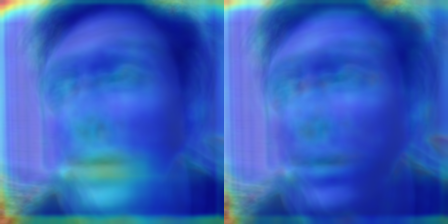

In [4]:
for data_path in data_paths:
    result = []
    skip_flag = False
    for checkpoint_path, current_config in checkpoint_paths:
        model = InitModel(current_config)
        checkpoint = torch.load(checkpoint_path)
        model.load_state_dict(checkpoint['state_dict'])
        target_layers = [
            model.module.base_model.layer1[-1],
            model.module.base_model.layer2[-1],
            model.module.base_model.layer3[-1],
            model.module.base_model.layer4[-1]
        ]
        cam = CAM(model=model, target_layers=target_layers, use_cuda=True)
        print(checkpoint_path, data_path)
        showCAM_result = ShowCAM(cam, model, data_path, transform, show=False, wanted_result_type='TP')
        if showCAM_result is None:
            skip_flag = True
            break
        result.append(showCAM_result)
    
    if skip_flag:
        continue
        
    mean_img = [np.zeros((224,224,3)), np.zeros((224,224,3))]
    for i in range(len(checkpoint_paths)):
        for j in range(14):
            mean_img[i] += np.array(result[i][j])
        mean_img[i] /= 14
        mean_img[i] = Image.fromarray(mean_img[i].astype(np.uint8))
    
    concatenated_image = Image.new('RGB', (224*len(checkpoint_paths), 224))
    for i in range(len(checkpoint_paths)):
        concatenated_image.paste(mean_img[i], (224*i, 0))
    concatenated_image.show()